In [11]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import pandas as pd
import numpy as np
from scipy.optimize import Bounds
from models.jump_cir import JumpCIR
from calibration.mle_calibration import Calibration

In [12]:
df_1mo_yc = pd.read_csv("../data/DGS1MO.csv")
df_1mo_yc.index = pd.to_datetime(df_1mo_yc.DATE)
df_1mo_yc = df_1mo_yc.dropna().drop(columns=["DATE"])
df_1mo_yc.DGS1MO = df_1mo_yc.DGS1MO.replace(".", np.nan).astype(float)/100
df_1mo_yc = df_1mo_yc.dropna()
df_1mo_yc = df_1mo_yc[df_1mo_yc.DGS1MO > 0] # drop non-pos, special for CIR
df_1mo_yc = df_1mo_yc.iloc[-int(252*2):-1, :] # last 1 years (252)

<AxesSubplot:xlabel='DATE'>

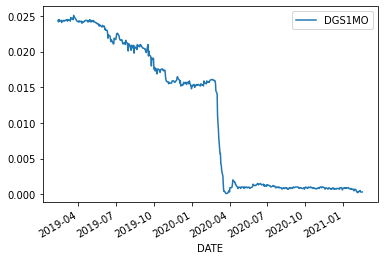

In [13]:
df_1mo_yc.plot()

In [14]:
inital_model_params = {
    "kappa": 0.5,
    "mu_r": 0.03,
    "sigma": 0.03,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}
calibrator = Calibration(
    df_1mo_yc.DGS1MO, dt=1/252, model_class=JumpCIR,
    initial_params=inital_model_params)
bounds = Bounds([0.001, 0.001, 0.001, 0.001, 0.1], [1, 0.1, 0.5, 0.1, 10])
calibrator.calibrate(bounds=bounds, params=("kappa", "mu_r", "sigma", "gamma", "h"))

Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -13.653632452300368
Params: {'kappa': 0.50000001, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -13.653632448774527
Params: {'kappa': 0.5, 'mu_r': 0.03000001, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -13.653632389117053
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03000001, 'mu': 0, 'gamma': 0.01, 'h': 10.0}
Neg Log Likelihood: -13.653632399544302
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01000001, 'h': 10.0}
Neg Log Likelihood: -13.653632451404384
Params: {'kappa': 0.5, 'mu_r': 0.03, 'sigma': 0.03, 'mu': 0, 'gamma': 0.01, 'h': 9.99999999}
Neg Log Likelihood: -13.653632452339151
Params: {'kappa': 0.14741590651825007, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.996121680433431}
Neg Log Likelihood: -16.727794588577023
Params: {'kappa': 0.14741591651825006, 'mu_r': 0

Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.992072974914178}
Neg Log Likelihood: -16.813910842144608
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.00100001, 'h': 9.992072974914178}
Neg Log Likelihood: -16.813920834882364
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.992072984914179}
Neg Log Likelihood: -16.81392083829082
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.991711541865213}
Neg Log Likelihood: -16.813922259332223
Params: {'kappa': 0.00100001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.991711541865213}
Neg Log Likelihood: -16.81392225923234
Params: {'kappa': 0.001, 'mu_r': 0.00100001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 9.991711541865213}
Neg Log Likelihood: -16.813922259293
Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.00100001, 'mu': 0, 'gamma': 0.001, 'h': 9.991711541865213}
Neg L

Params: {'kappa': 0.001, 'mu_r': 0.001, 'sigma': 0.001, 'mu': 0, 'gamma': 0.001, 'h': 0.10000001}
Neg Log Likelihood: -16.85281222522101


      fun: -16.852812225260326
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.99271776e-03, 3.92397226e-03, 9.99981339e+02, 3.45181661e-03,
       3.93143296e-03])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 114
      nit: 3
     njev: 19
   status: 0
  success: True
        x: array([0.001, 0.001, 0.001, 0.001, 0.1  ])